In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-bangalore-restaurants/zomato.csv


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
zds=pd.read_csv('/kaggle/input/zomato-bangalore-restaurants/zomato.csv')
zds.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
zds.shape

(51717, 17)

In [6]:
zds.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
zds= zds.drop(['url', 'address','phone','menu_item','dish_liked','reviews_list'],axis=1)
zds.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [8]:
zds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [9]:
zds.drop_duplicates(inplace=True)
zds.shape

(51609, 11)

In [10]:
zds['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [11]:
def handlerate(value):
    if(value=='NEW' or value=='-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)

In [12]:
zds['rate'] = zds['rate'].apply(handlerate)
zds['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [13]:
zds['rate'].isnull().sum()

10019

In [14]:
zds['rate'].fillna(zds['rate'].mean(),inplace = True)
zds['rate'].isnull().sum()

/tmp/ipykernel_33/2015261356.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  zds['rate'].fillna(zds['rate'].mean(),inplace = True)


0

In [15]:
zds.dropna(inplace = True)
zds.shape

(51042, 11)

In [16]:
zds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51042 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51042 non-null  object 
 1   online_order                 51042 non-null  object 
 2   book_table                   51042 non-null  object 
 3   rate                         51042 non-null  float64
 4   votes                        51042 non-null  int64  
 5   location                     51042 non-null  object 
 6   rest_type                    51042 non-null  object 
 7   cuisines                     51042 non-null  object 
 8   approx_cost(for two people)  51042 non-null  object 
 9   listed_in(type)              51042 non-null  object 
 10  listed_in(city)              51042 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


In [41]:
zds.rename(columns = {'approx_cost(for two people)':'CostFor2',
                      'rest_type' : 'type'},inplace=True)
zds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51042 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             51042 non-null  object 
 1   online_order     51042 non-null  object 
 2   book_table       51042 non-null  object 
 3   rate             51042 non-null  float64
 4   votes            51042 non-null  int64  
 5   location         51042 non-null  object 
 6   type             51042 non-null  object 
 7   cuisines         51042 non-null  object 
 8   CostFor2         51042 non-null  float64
 9   listed_in(type)  51042 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


In [18]:
zds['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [19]:
zds= zds.drop(['listed_in(city)'], axis = 1)

In [20]:
zds['CostFor2'].unique() #remove commas from cost

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [21]:
def handlecomma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',','')
        return float(value)
    else:
        return float(value)

In [22]:
zds['CostFor2'] = zds['CostFor2'].apply(handlecomma)
zds['CostFor2'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [23]:
rest = zds['rest_type'].value_counts()
restless1000 = rest[rest<1000]


In [24]:
def handle_rest(value):
    if(value in restless1000):
        return 'Others'
    else:
        return value
    
zds['rest_type'] = zds['rest_type'].apply(handle_rest)
zds['rest_type'].value_counts()

rest_type
Quick Bites           19010
Casual Dining         10253
Others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: count, dtype: int64

In [25]:
loc = zds['location'].value_counts(ascending  = False)

loc_lessthan300 = loc[loc<300]



def handle_location(value):
    if(value in loc_lessthan300):
        return 'others'
    else:
        return value
        
zds['location'] = zds['location'].apply(handle_location)
zds['location'].value_counts()

location
BTM                      5056
others                   4954
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
L

In [26]:
cuisines = zds['cuisines'].value_counts(ascending  = False)

cuisines_lessthan100 = cuisines[cuisines<100]



def handle_location(value):
    if(value in cuisines_lessthan100):
        return 'others'
    else:
        return value
        
zds['cuisines'] = zds['cuisines'].apply(handle_location)
zds['cuisines'].value_counts()

cuisines
others                                 26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: count, Length: 70, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'BTM'),
  Text(1, 0, 'others'),
  Text(2, 0, 'HSR'),
  Text(3, 0, 'Koramangala 5th Block'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Whitefield'),
  Text(6, 0, 'Indiranagar'),
  Text(7, 0, 'Jayanagar'),
  Text(8, 0, 'Marathahalli'),
  Text(9, 0, 'Bannerghatta Road'),
  Text(10, 0, 'Bellandur'),
  Text(11, 0, 'Electronic City'),
  Text(12, 0, 'Koramangala 1st Block'),
  Text(13, 0, 'Brigade Road'),
  Text(14, 0, 'Koramangala 7th Block'),
  Text(15, 0, 'Koramangala 6th Block'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Koramangala 4th Block'),
  Text(18, 0, 'Ulsoor'),
  Text(19, 0, 'Banashankari'),
  Text(20, 0, 'MG Road'),
  Text(21, 0, 'Kalyan Nagar'),
  Text(22, 0, 'Richmond Road'),
  Text(23, 0, 'Malleshwaram'),
  Text(24, 0, 'Frazer Town'),
  Text(25, 0, 'Basavanagudi'),
  Te

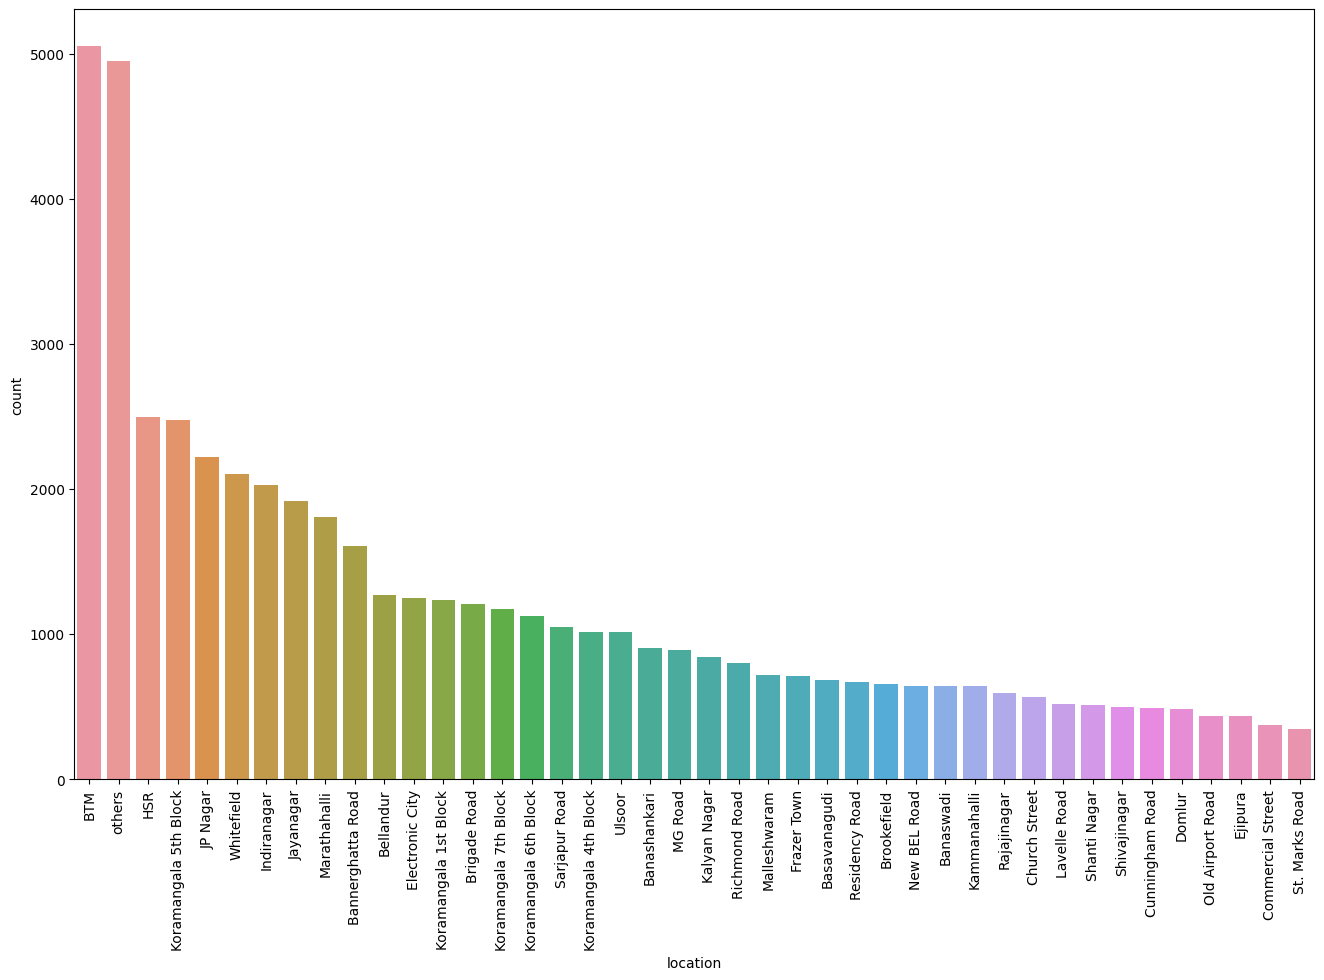

In [27]:
plt.figure(figsize = (16,10))
ax = sns.countplot(x='location', data=zds, order=zds['location'].value_counts().index)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability


<Axes: xlabel='online_order', ylabel='count'>

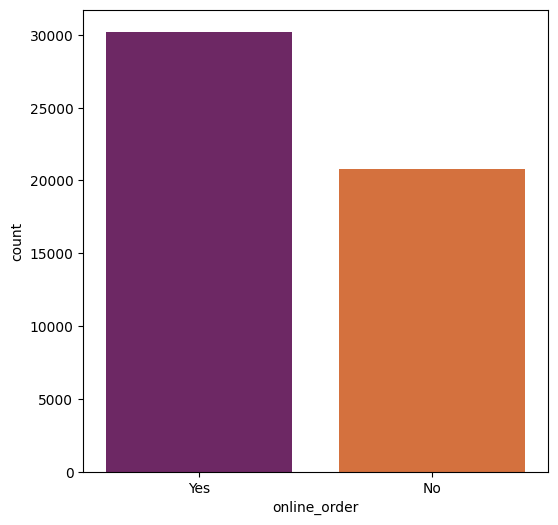

In [28]:
plt.figure(figsize=(6,6))
sns.countplot(x='online_order', data=zds, order=zds['online_order'].value_counts().index,palette = 'inferno')


<Axes: xlabel='book_table', ylabel='count'>

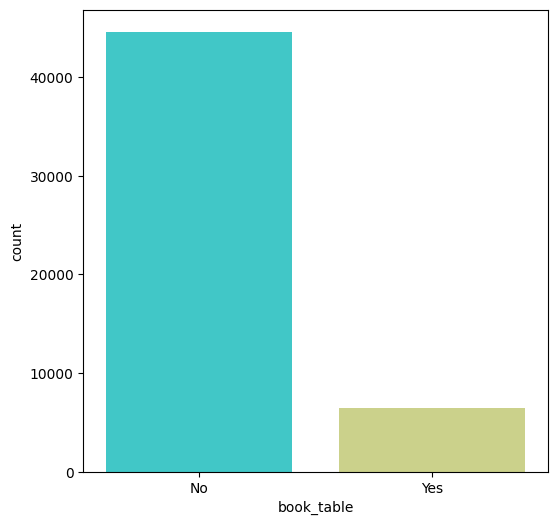

In [29]:
plt.figure(figsize=(6,6))
sns.countplot(x='book_table', data=zds, order=zds['book_table'].value_counts().index,palette = 'rainbow')


<Axes: xlabel='online_order', ylabel='rate'>

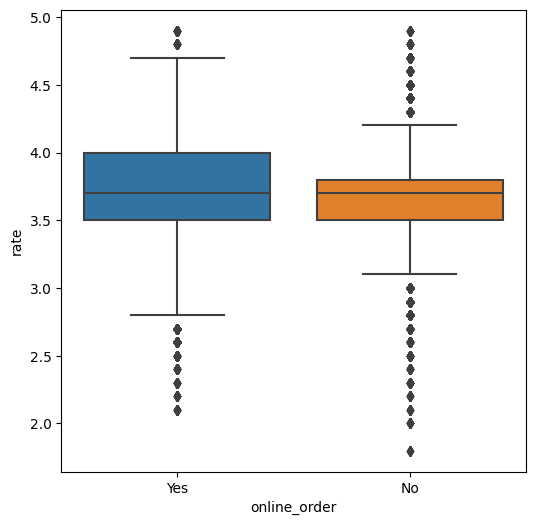

In [30]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=zds)

<Axes: xlabel='book_table', ylabel='rate'>

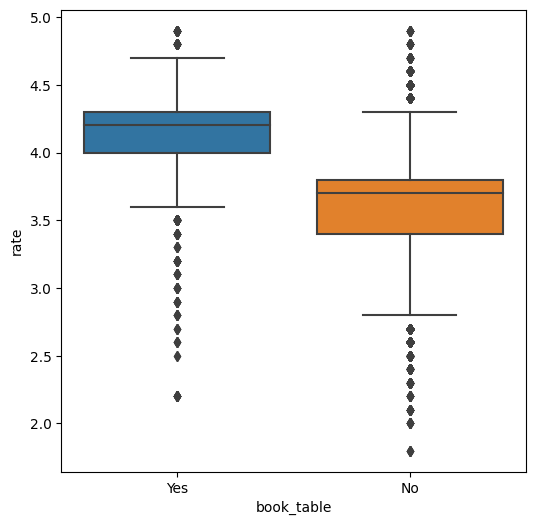

In [31]:
plt.figure(figsize=(6,6))
sns.boxplot(x='book_table',y='rate',data=zds)

In [32]:
df1=zds.groupby(['location','online_order'])['name'].count()
df1.to_csv('loc_online.csv')
df1=pd.read_csv('loc_online.csv')
df1=pd.pivot_table(df1,values=None,index=['location'],columns=['online_order'],fill_value=0,aggfunc=np.sum)
df1

/tmp/ipykernel_33/222827993.py:4: FutureWarning: The provided callable <function sum at 0x7d5c901ab6d0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df1=pd.pivot_table(df1,values=None,index=['location'],columns=['online_order'],fill_value=0,aggfunc=np.sum)


name      
online_order             No   Yes
location                         
BTM                    1763  3293
Banashankari            397   505
Banaswadi               302   338
Bannerghatta Road       685   924
Basavanagudi            243   441
Bellandur               517   751
Brigade Road            552   658
Brookefield             239   417
Church Street           226   340
Commercial Street       228   142
Cunningham Road         168   322
Domlur                  247   235
Ejipura                 214   219
Electronic City         676   570
Frazer Town             287   427
HSR                     584  1910
Indiranagar             697  1329
JP Nagar                911  1307
Jayanagar               552  1364
Kalyan Nagar            350   491
Kammanahalli            264   375
Koramangala 1st Block   384   852
Koramangala 4th Block   459   558
Koramangala 5th Block   866  1613
Koramangala 6th Block   445   682
Koramangala 7th Block   389   785
Lavelle Road            315   203
MG Road                 520   373
Malleshwaram            309   412
Marathahalli            701  1104
New BEL Road            255   389
Old Airport Road        221   216
Rajajinagar             286   305
Residency Road          424   247
Richmond Road           557   246
Sarjapur Road           323   724
Shanti Nagar            289   219
Shivajinagar            354   144
St. Marks Road          176   167
Ulsoor                  389   622
Whitefield              986  1119
others                 2064  2890

<Axes: xlabel='location'>

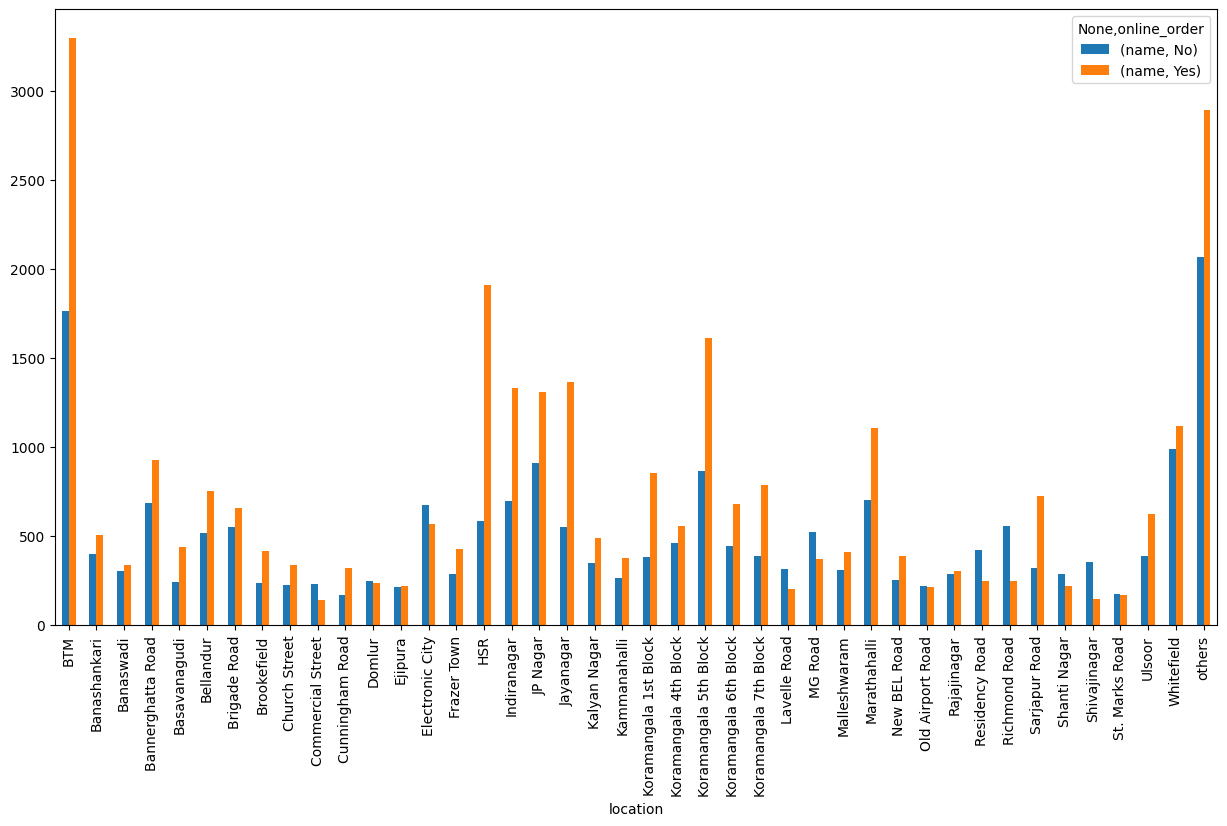

In [33]:
df1.plot(kind='bar',figsize=(15,8))

<Axes: xlabel='location'>

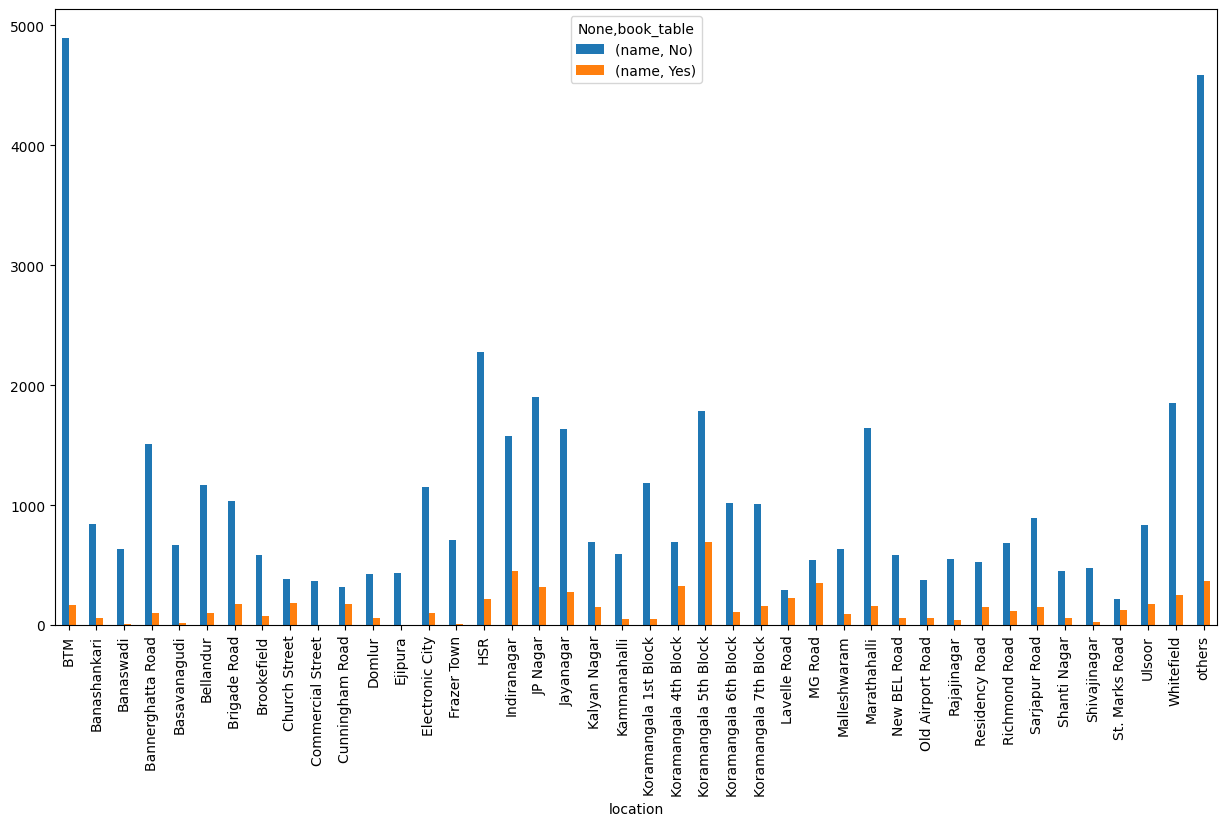

In [37]:
df2.plot(kind='bar',figsize=(15,8))

In [36]:
df2 = zds.groupby(['location','book_table'])['name'].count()
df2.to_csv('location_booktable.csv')
df2 = pd.read_csv('location_booktable.csv')
df2 = pd.pivot_table(df2, values=None, index=['location'], columns=['book_table'], fill_value=0, aggfunc=np.sum)
df2

/tmp/ipykernel_33/93767884.py:4: FutureWarning: The provided callable <function sum at 0x7d5c901ab6d0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df2 = pd.pivot_table(df2, values=None, index=['location'], columns=['book_table'], fill_value=0, aggfunc=np.sum)


name     
book_table               No  Yes
location                        
BTM                    4889  167
Banashankari            839   63
Banaswadi               632    8
Bannerghatta Road      1510   99
Basavanagudi            668   16
Bellandur              1170   98
Brigade Road           1034  176
Brookefield             582   74
Church Street           385  181
Commercial Street       370    0
Cunningham Road         315  175
Domlur                  427   55
Ejipura                 433    0
Electronic City        1148   98
Frazer Town             706    8
HSR                    2277  217
Indiranagar            1578  448
JP Nagar               1903  315
Jayanagar              1637  279
Kalyan Nagar            692  149
Kammanahalli            590   49
Koramangala 1st Block  1186   50
Koramangala 4th Block   695  322
Koramangala 5th Block  1787  692
Koramangala 6th Block  1015  112
Koramangala 7th Block  1012  162
Lavelle Road            290  228
MG Road                 546  347
Malleshwaram            632   89
Marathahalli           1642  163
New BEL Road            588   56
Old Airport Road        378   59
Rajajinagar             550   41
Residency Road          522  149
Richmond Road           687  116
Sarjapur Road           893  154
Shanti Nagar            451   57
Shivajinagar            475   23
St. Marks Road          219  124
Ulsoor                  834  177
Whitefield             1852  253
others                 4587  367

<Axes: xlabel='type', ylabel='rate'>

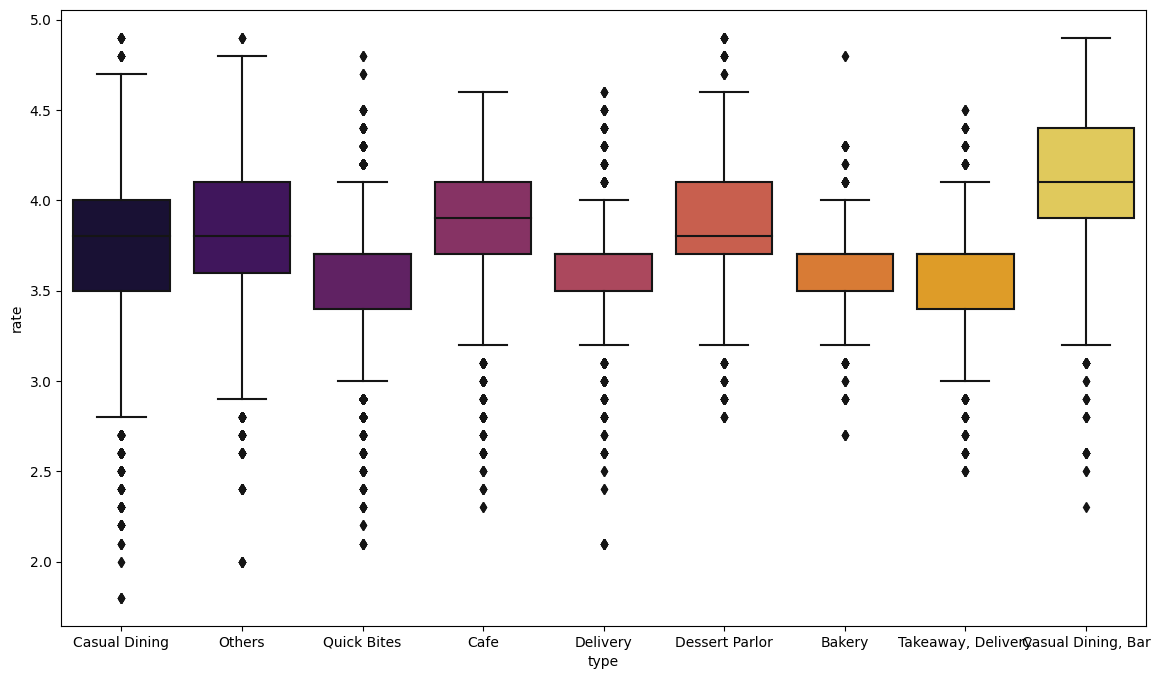

In [42]:
plt.figure(figsize=(14,8))
sns.boxplot(x='type',y='rate',data=zds,palette='inferno')

In [44]:
df3 = zds.groupby(['location','type'])['name'].count()
df3.to_csv('location_type.csv')
df3 = pd.read_csv('location_type.csv')
df3 = pd.pivot_table(df3, values=None, index=['location'], columns=['type'], fill_value=0, aggfunc=np.sum)
df3

/tmp/ipykernel_33/271162850.py:4: FutureWarning: The provided callable <function sum at 0x7d5c901ab6d0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df3 = pd.pivot_table(df3, values=None, index=['location'], columns=['type'], fill_value=0, aggfunc=np.sum)


name                                                 \
type                  Bakery Cafe Casual Dining Casual Dining, Bar Delivery   
location                                                                      
BTM                       76  290           711                 22      254   
Banashankari              20   87           148                  1       28   
Banaswadi                 27   44           106                  9       13   
Bannerghatta Road         53   79           312                 10       69   
Basavanagudi              35   42            98                  8        0   
Bellandur                 16   55           295                 28       60   
Brigade Road              30  111           289                 26        0   
Brookefield               23   35           135                 12        6   
Church Street              0   92           151                 71        0   
Commercial Street          6   20            71                  0        0   
Cunningham Road            3   46           202                  0        4   
Domlur                    26   11            90                 11       58   
Ejipura                    0    0            27                  0       45   
Electronic City           39   43           282                 19       61   
Frazer Town               33   35           147                  0       61   
HSR                       33  141           541                 23      186   
Indiranagar               28  189           477                 51      171   
JP Nagar                  63  158           543                 53      123   
Jayanagar                 59  201           481                 18       14   
Kalyan Nagar              17   75           240                  9       31   
Kammanahalli               2   51           143                 10       24   
Koramangala 1st Block     42   97           102                 57      107   
Koramangala 4th Block     33  138           179                 44      121   
Koramangala 5th Block     28  351           559                 81       50   
Koramangala 6th Block     14  109           216                  0       80   
Koramangala 7th Block     25  117           283                 59       97   
Lavelle Road              20    5            79                113       10   
MG Road                    3  102           172                 30        6   
Malleshwaram              15   58           115                 14        7   
Marathahalli              49   67           392                 46      109   
New BEL Road               9   73           113                  2       22   
Old Airport Road          23    9            72                  8       32   
Rajajinagar               16    6           112                 16       12   
Residency Road             0   57           152                  9       14   
Richmond Road             10   43           203                 14        8   
Sarjapur Road             52   48           198                 16       95   
Shanti Nagar               6   46           145                  0       13   
Shivajinagar               6   22            43                 23        0   
St. Marks Road             0   20            95                 60        0   
Ulsoor                    38  129           174                 48       27   
Whitefield                58   65           451                 37      137   
others                   104  315           909                 72      419   

                                                                            
type                  Dessert Parlor Others Quick Bites Takeaway, Delivery  
location                                                                    
BTM                              111    551        2707                334  
Banashankari                      47    126         428                 17  
Banaswadi                         12     82         325                 22  
Banner

<Axes: xlabel='location'>

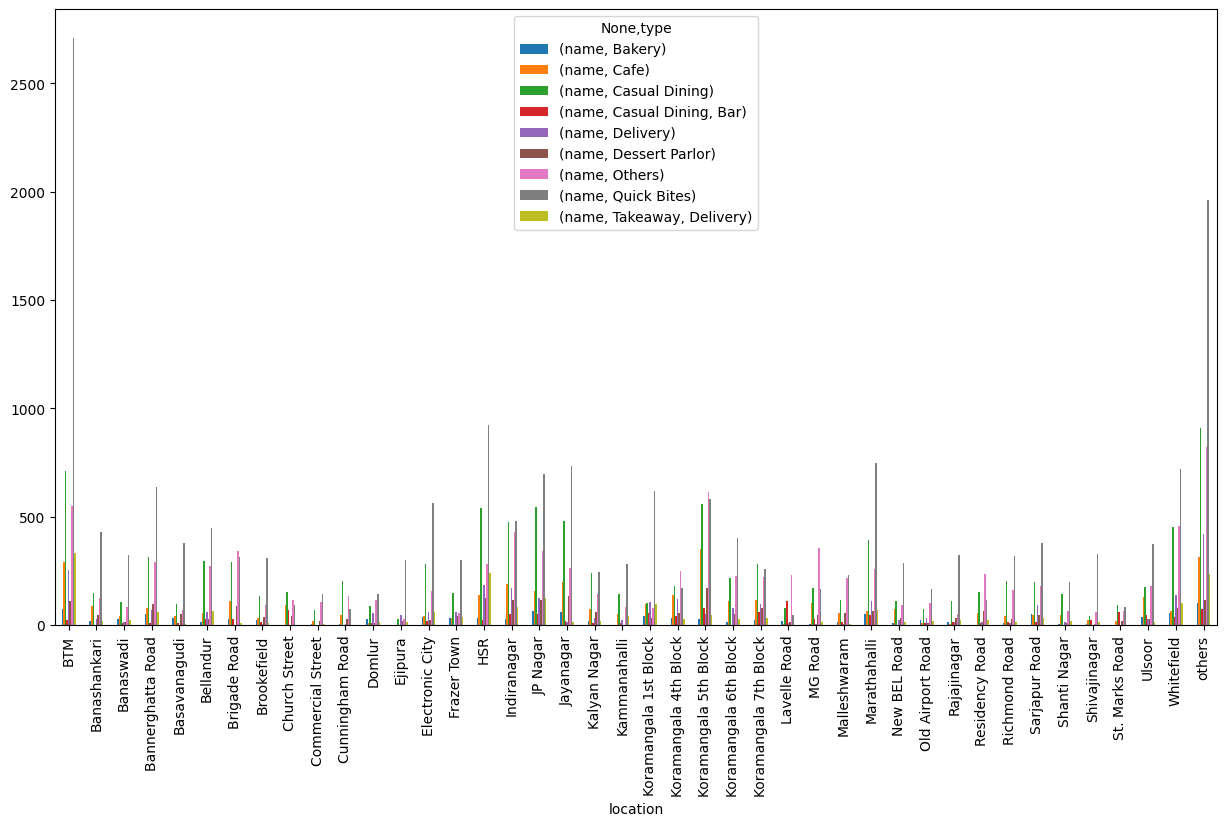

In [45]:
df3.plot(kind='bar',figsize=(15,8))

In [46]:
df4=zds[['location','votes']]
df4.drop_duplicates()
df5=df4.groupby(['location'])['votes'].sum()
df5=df5.to_frame()
df5=df5.sort_values('votes',ascending=False)
df5.head()

,votes
location,
Koramangala 5th Block,2214083
Indiranagar,1165909
Koramangala 4th Block,685156
Church Street,590306
JP Nagar,586522


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'Koramangala 5th Block'),
  Text(1, 0, 'Indiranagar'),
  Text(2, 0, 'Koramangala 4th Block'),
  Text(3, 0, 'Church Street'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'BTM'),
  Text(6, 0, 'others'),
  Text(7, 0, 'HSR'),
  Text(8, 0, 'Lavelle Road'),
  Text(9, 0, 'Koramangala 7th Block'),
  Text(10, 0, 'Jayanagar'),
  Text(11, 0, 'Whitefield'),
  Text(12, 0, 'Koramangala 6th Block'),
  Text(13, 0, 'Marathahalli'),
  Text(14, 0, 'MG Road'),
  Text(15, 0, 'Brigade Road'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Residency Road'),
  Text(18, 0, 'Cunningham Road'),
  Text(19, 0, 'St. Marks Road'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Malleshwaram'),
  Text(22, 0, 'Bannerghatta Road'),
  Text(23, 0, 'Bellandur'),
  Text(24, 0, 'Ulsoor'),
  Text(25, 0, 'New BEL Road'),

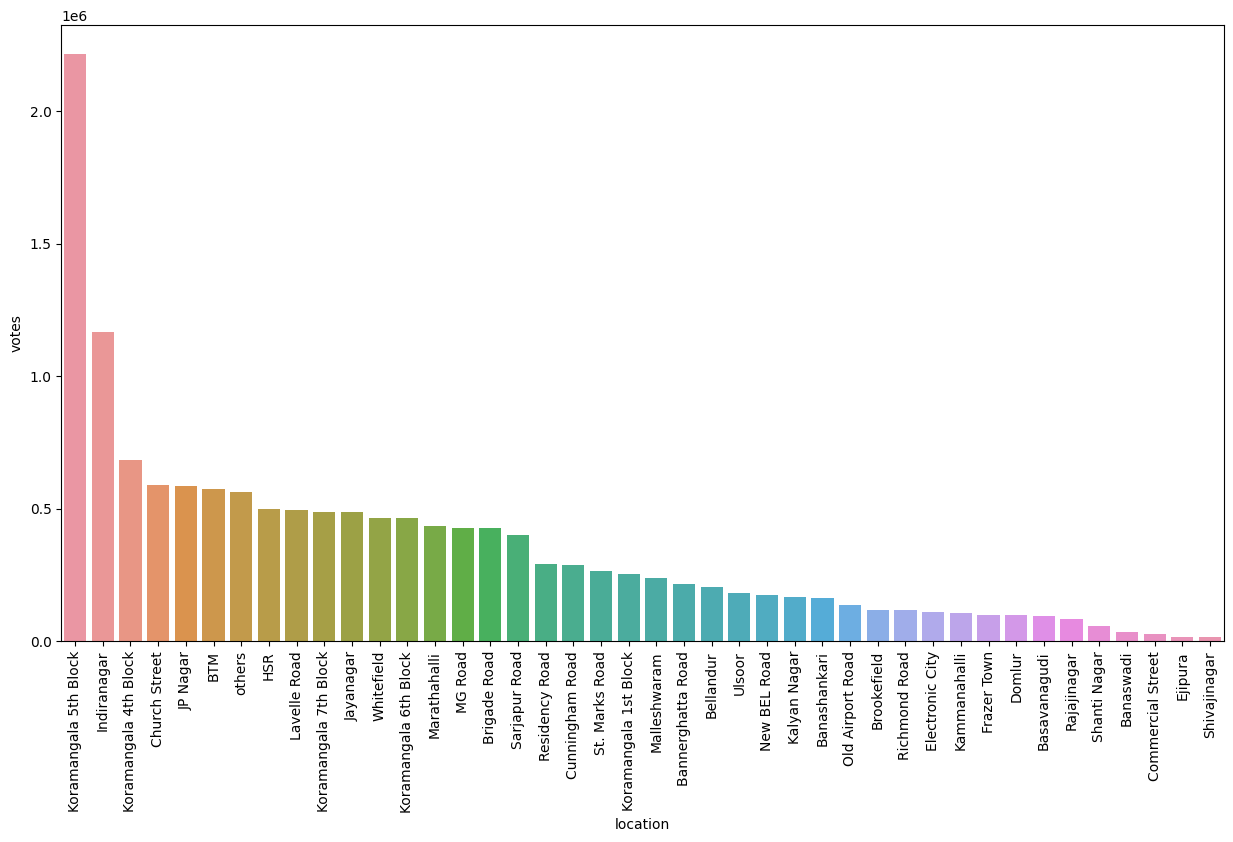

In [49]:
plt.figure(figsize = (15,8))
sns.barplot(x=df5.index , y=df5['votes'])
plt.xticks(rotation = 90)

In [51]:
df6=zds[['cuisines','votes']]
df6.drop_duplicates()
df7 = df6.groupby(['cuisines'])['votes'].sum()
df7 = df7.to_frame()
df7 = df7.sort_values('votes',ascending = False)
df7.head()

,votes
cuisines,
others,11542182
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706


In [52]:
df7=df7.iloc[1:,:]
df7.head()

,votes
cuisines,
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706
Chinese,101728


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68]),
 [Text(0, 0, 'North Indian'),
  Text(1, 0, 'North Indian, Chinese'),
  Text(2, 0, 'South Indian'),
  Text(3, 0, 'North Indian, Mughlai'),
  Text(4, 0, 'Chinese'),
  Text(5, 0, 'Cafe'),
  Text(6, 0, 'North Indian, South Indian'),
  Text(7, 0, 'Desserts'),
  Text(8, 0, 'Chinese, Momos'),
  Text(9, 0, 'Ice Cream, Desserts'),
  Text(10, 0, 'Cafe, Continental'),
  Text(11, 0, 'Biryani, North Indian, Chinese'),
  Text(12, 0, 'Chinese, Thai, Momos'),
  Text(13, 0, 'South Indian, North Indian, Chinese'),
  Text(14, 0, 'Desserts, Beverages'),
  Text(15, 0, 'Biryani'),
  Text(16, 0, 'Finger Food'),
  Text(17, 0, 'Bakery, Desserts'),
  Text(18, 0, 'Burger, Fast Food'),
  Text(19, 0, '

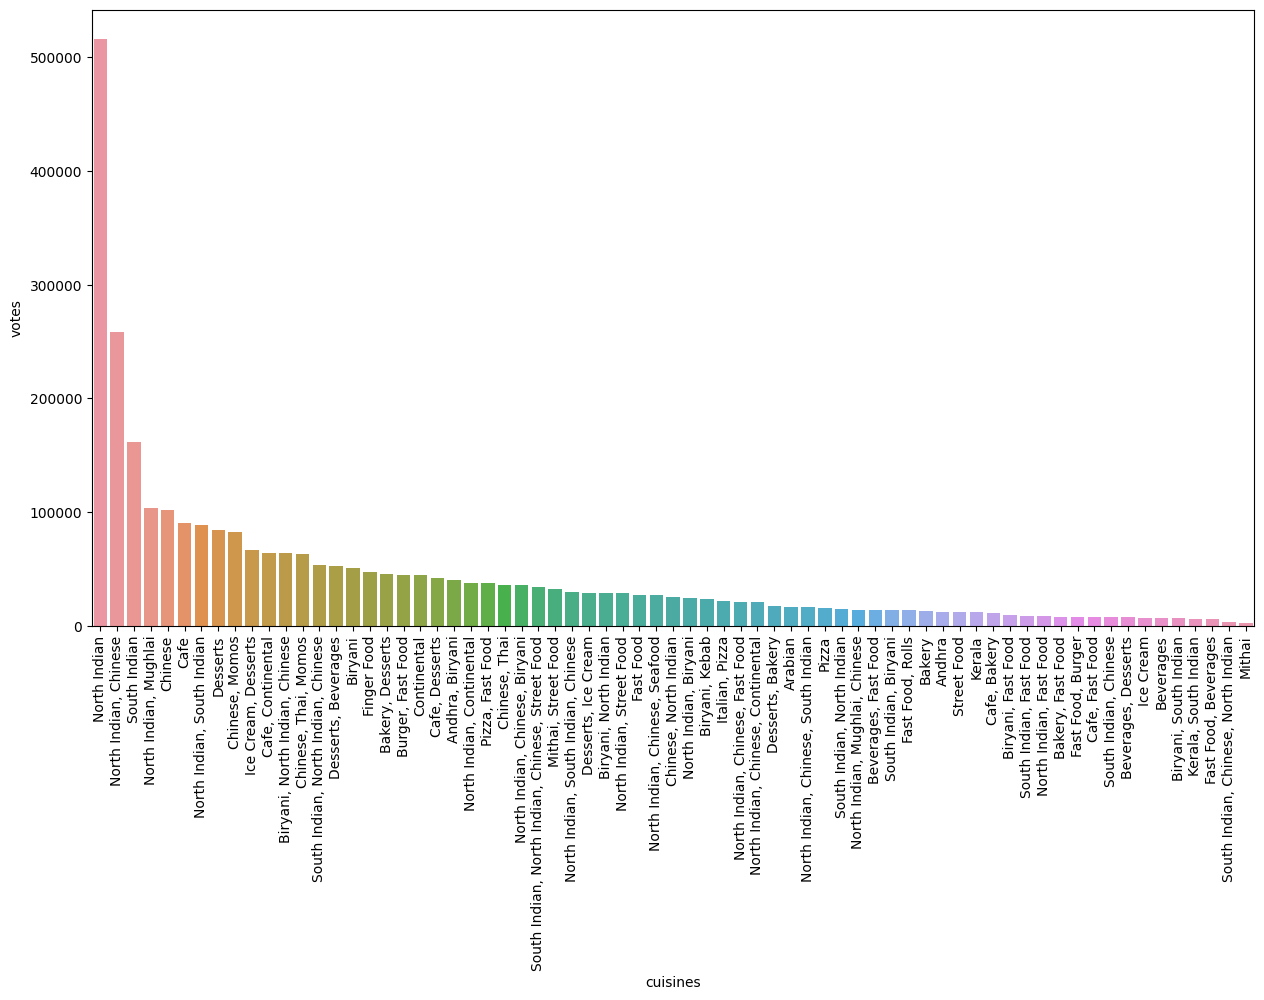

In [53]:
plt.figure(figsize = (15,8))
sns.barplot(x=df7.index , y=df7['votes'])
plt.xticks(rotation = 90)